In [1]:
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import matplotlib
import os, sys
from math import floor

sys.path.append("code/")
from training import create_checkpoint_filename
from check_model import compute_skill


INFO:numexpr.utils:Note: detected 80 virtual cores but NumExpr set to maximum of 64, check "NUMEXPR_MAX_THREADS" environment variable.
INFO:numexpr.utils:Note: NumExpr detected 80 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.


In [2]:
#updates parameter tuple and resets the network
def increment_parameter_tuple(p_before,sliding_window=False):
  fn_before = create_checkpoint_filename(p_before)
  p_new=list(p_before)
  p_new[start_day_postion_in_the_list]=p_new[start_day_postion_in_the_list]+training_step_length
  if sliding_window:
    p_new[training_step_length_position]=p_new[training_step_length_position]+training_step_length
  p_new=tuple(p_new)
  fn_new = create_checkpoint_filename(p_new)
  return p_new


In [3]:
#load skills
def load_skills(param_list,ts,number_of_training_steps,wds,rdir,sliding_window=False):
    skills = np.empty((len(ts), number_of_training_steps, len(wds)))

    ptmp=list(param_list[0])
    ptmp[start_day_postion_in_the_list]=starting_step
    ptmp=tuple(ptmp)
    for step in range(number_of_training_steps):
        param_list_new=[]
        for w in range(len(wds)):
            ptmp=param_list[w]
            fntmp1 = create_checkpoint_filename(ptmp)
            fntmp2 = os.path.join(rdir,'skill_'+os.path.split(fntmp1)[-1]+'.npy')
            skills[:, step, w]=np.load(fntmp2)

            #increment parameter tuple in time
            param_list_new.append( increment_parameter_tuple(ptmp,sliding_window) )
        param_list=param_list_new
    return skills


In [6]:
ndays=np.array([7,14,30,60,180,365,730,1460,2920,])
varsn=['t','q','u','v']
skills={}
skills_av={}

for vn in varsn:
    skills[vn]=[]
    skills_av[vn]=[]
    for nd in ndays:
        tmp = np.load(f'npys/skill_conv2d_{vn}_4_1_4096_3_0.25_32_mse_0.0001_1.0_3285_{nd}_0.7.npy')
        skills[vn].append(tmp)
        skills_av[vn].append(np.average(tmp[365*10*4:-1]))
  


In [30]:
#load nn trained with 8 degree data
#ndays=np.array([7,14,30,60,180,365,730,1460,2920,])
#skills=[]
#skills_av=[]
#for nd in ndays:
#    tmp = np.load(f'npys/skill_conv2d_t_4_1_4096_3_0.25_32_mse_0.0001_1.0_3285_{nd}_0.7.npy')
#    skills.append(tmp)
#    skills_av.append(np.average(tmp[365*10*4:-1]))
#ts_nn365 = np.arange(tmp.shape[0])/4


In [7]:
#load nn trained with 3 degree data
ndays2=np.array([7, 365])
skills2=[]
skills_av2=[]
for nd in ndays2:
    tmp = np.load(f'npys/skill_conv2d_t_4_1_4096_3_0.25_32_mse_0.0001_1.0_366_{nd}_0.7.npy')
    skills2.append(tmp)
    skills_av2.append(np.average(tmp[3285*4:-1]))

ndays2=np.append(ndays2,730)
tmp = np.load(f'npys/skill_conv2d_t_4_1_4096_3_0.25_32_mse_0.0001_1.0_732_730_0.7.npy')
skills2.append(tmp)
skills_av2.append(np.average(tmp[365*10*4:-1]))
#ts_nn365 = np.arange(tmp.shape[0])/4


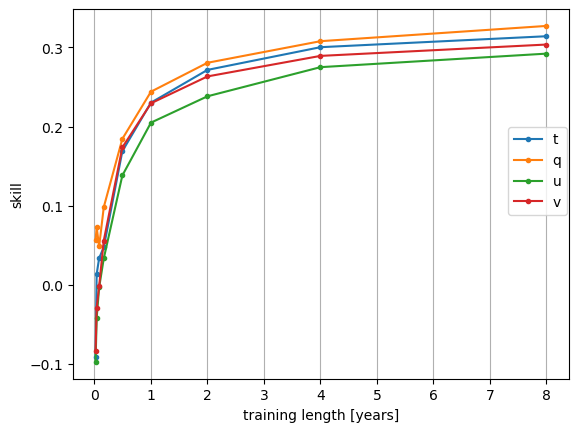

In [13]:
#plt.plot(ndays2/365,skills_av2, "o", markersize=10,label='t (2x res.)')
for vn in varsn:
    plt.plot(ndays/365,skills_av[vn], '.-',label=vn)

plt.xlabel('training length [years]')
plt.ylabel('skill')
plt.grid(axis='x')
plt.legend(bbox_to_anchor=(1.01, 0.7))
